##  Dataset Overview

### Source:
The dataset used in this project is the **Online Retail Dataset**, available from the **UCI Machine Learning Repository**. This dataset contains transactional data for a UK-based online retailer. The dataset provides information about customer purchases, including product details, quantity, price, and customer details (like country). 

Dataset Link: [UCI Online Retail Dataset](https://archive.ics.uci.edu/ml/datasets/online+retail)

### Columns:
- **InvoiceNo**: Unique identifier for each transaction.
- **StockCode**: Unique identifier for each product.
- **Description**: Name or description of the product.
- **Quantity**: Number of items purchased.
- **InvoiceDate**: Date and time of purchase.
- **UnitPrice**: Price per unit of the product.
- **CustomerID**: Unique identifier for each customer.
- **Country**: Country where the customer is located.




## Import necessary libraries


In [1]:

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

## 0 . Load Dataset and Show Characteristics

In [2]:

df = pd.read_excel('./Online Retail.xlsx')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()  

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df['CustomerID'].fillna('Unknown-Customer', inplace=True)
df['Description'].fillna('Unknown-DESC', inplace=True)

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']=df['InvoiceDate'].dt.strftime('%Y-%m-%d')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
# df = df[(df['CustomerID'] != 'Unknown') ]

In [11]:






print(df.isnull().sum())


print(f"\nCleaned Dataset Shape: {df.shape}")


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Cleaned Dataset Shape: (524877, 8)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524877 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524877 non-null  object 
 1   StockCode    524877 non-null  object 
 2   Description  524877 non-null  object 
 3   Quantity     524877 non-null  int64  
 4   InvoiceDate  524877 non-null  object 
 5   UnitPrice    524877 non-null  float64
 6   CustomerID   524877 non-null  object 
 7   Country      524877 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 36.0+ MB


## 1. Descriptive Analytics of All Data with Different Filters and Metrics

In [13]:
unique_products = df['StockCode'].nunique()
unique_customers = df['CustomerID'].nunique()

print(f"\nNumber of Unique Products: {unique_products}")
print(f"Number of Unique Customers: {unique_customers}")



Number of Unique Products: 3922
Number of Unique Customers: 4339


In [14]:
df['TotalSales']=df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [15]:

total_sales = df['TotalSales'].sum()
total_quantity = df['Quantity'].sum()

print(f"\nTotal Sales: £{total_sales:}")
print(f"Total Quantity Sold: {total_quantity}")


Total Sales: £10642106.904000003
Total Quantity Sold: 5572418


In [16]:
# 3. Top Products by Total Sales
top_products = df.groupby('Description').agg({'TotalSales': 'sum'}).sort_values(by='TotalSales', ascending=False).head(10)
print("\nTop 10 Products by Total Sales:")
print(top_products)



Top 10 Products by Total Sales:
                                    TotalSales
Description                                   
DOTCOM POSTAGE                       206248.77
REGENCY CAKESTAND 3 TIER             174156.54
PAPER CRAFT , LITTLE BIRDIE          168469.60
WHITE HANGING HEART T-LIGHT HOLDER   106236.72
PARTY BUNTING                         99445.23
JUMBO BAG RED RETROSPOT               94159.81
MEDIUM CERAMIC TOP STORAGE JAR        81700.92
POSTAGE                               78101.88
Manual                                77752.82
RABBIT NIGHT LIGHT                    66870.03


<Figure size 1000x600 with 0 Axes>

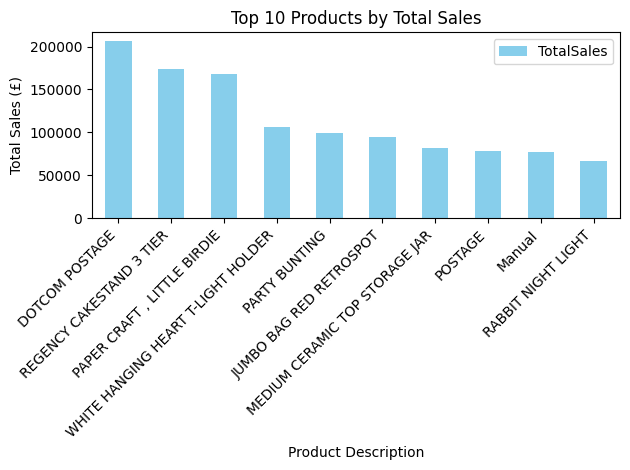

In [17]:
plt.figure(figsize=(10, 6)) 
top_products.plot(kind='bar', color='skyblue') 
plt.title('Top 10 Products by Total Sales')  
plt.xlabel('Product Description')  
plt.ylabel('Total Sales (£)') 
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()  

In [18]:

# 4. Top Countries by Sales
top_countries = df.groupby('Country').agg({'TotalSales': 'sum'}).sort_values(by='TotalSales', ascending=False).head(5)
print("\nTop 10 Countries by Total Sales:")
print(top_countries)


Top 10 Countries by Total Sales:
                 TotalSales
Country                    
United Kingdom  9001740.194
Netherlands      285446.340
EIRE             283140.520
Germany          228678.400
France           209625.370


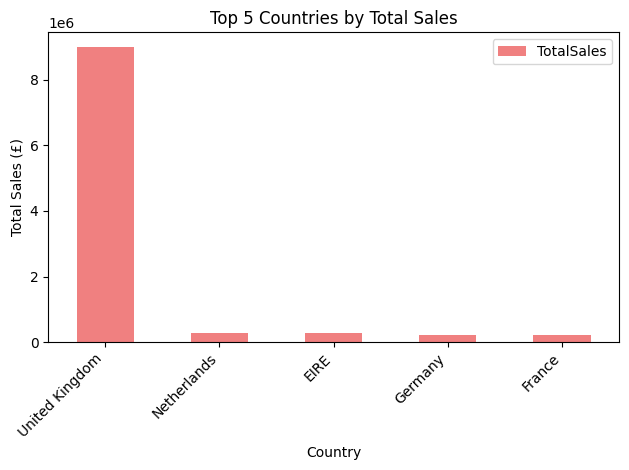

In [19]:
top_countries.plot(kind='bar', color='lightcoral') 
plt.title('Top 5 Countries by Total Sales')  
plt.xlabel('Country') 
plt.ylabel('Total Sales (£)')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()  # Display the plot

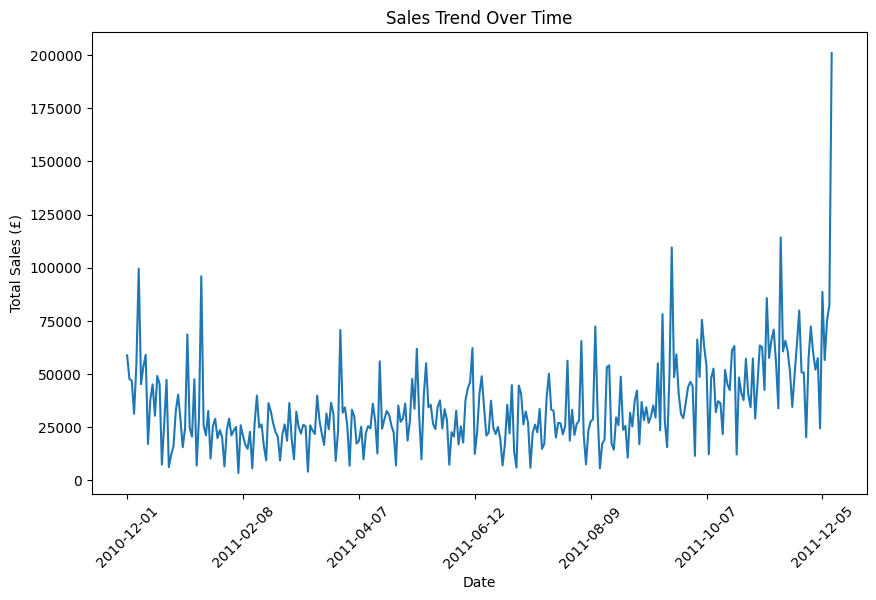

In [20]:

df['Date'] = df['InvoiceDate']
sales_trend = df.groupby('Date')['TotalSales'].sum()
plt.figure(figsize=(10, 6))
sales_trend.plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=45)
plt.show()


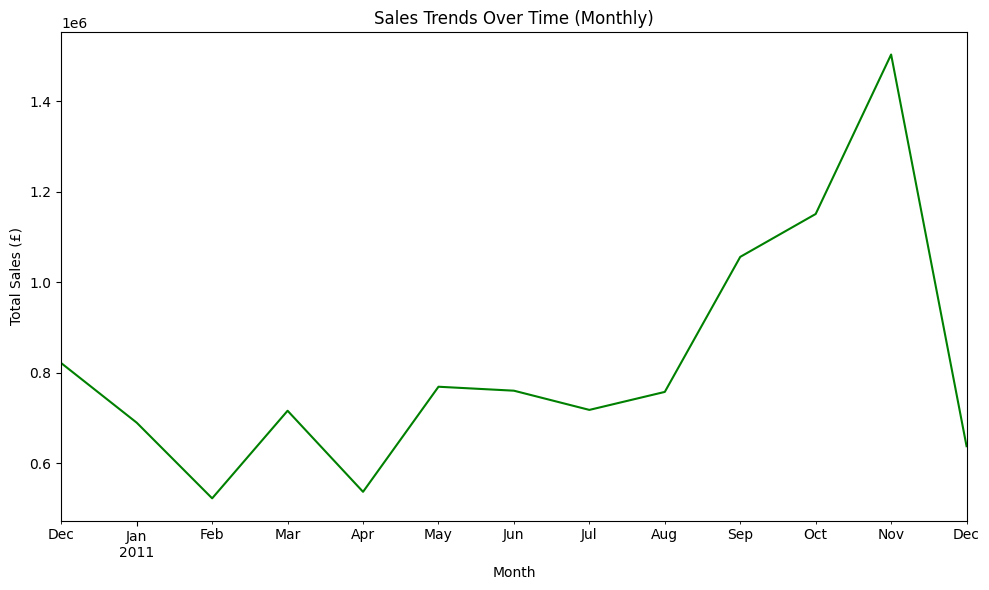

In [21]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')


monthly_sales = df.groupby('YearMonth')['TotalSales'].sum()


plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', color='green')
plt.title('Sales Trends Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.tight_layout()
plt.show()


In [22]:
total_sales = df['TotalSales'].sum()
unique_orders = df['InvoiceNo'].nunique()
AOV = total_sales / unique_orders
print(f"Average Order Value (AOV): £{AOV}")

Average Order Value (AOV): £533.1716885771544


In [23]:
revenue_per_customer = df.groupby('CustomerID')['TotalSales'].sum()
average_revenue_per_customer = revenue_per_customer.mean()
print(f"Average Revenue per Customer: £{average_revenue_per_customer:.2f}")

Average Revenue per Customer: £2452.66


In [24]:

top_customers = df.groupby('CustomerID').agg(total_sales=('TotalSales','sum') ).sort_values(by='total_sales', ascending=False).head(11)


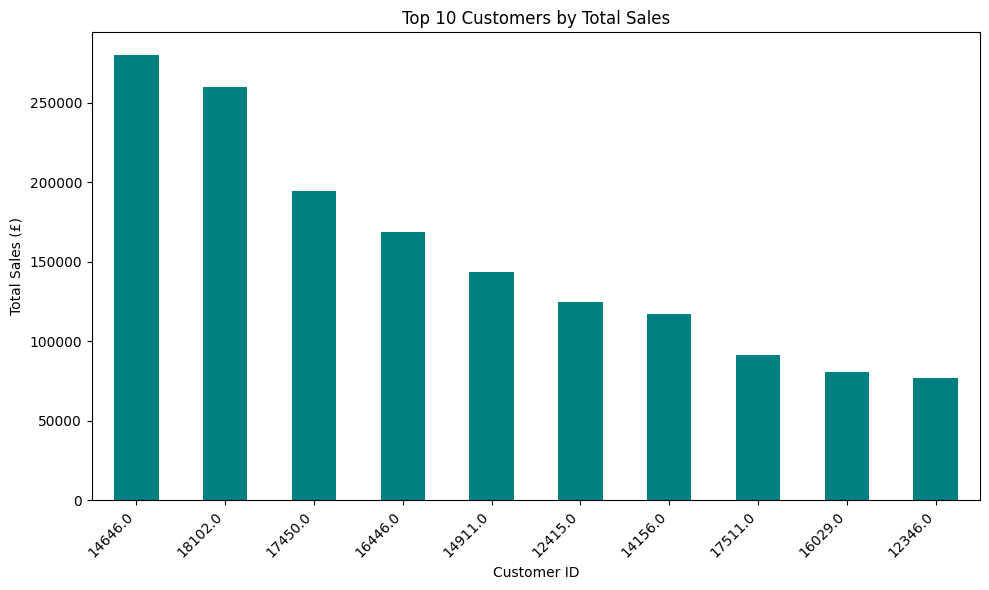

In [25]:
# 3. Visualize the Top 10 Customers by Total Sales
plt.figure(figsize=(10, 6))
top_customers['total_sales'].iloc[1:].plot(kind='bar', color='teal')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 2. Pareto and ABC Analysis with Multi-Criteria

In [26]:

sales_by_product = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)

sales_by_product_cumsum = sales_by_product.cumsum()

total_sales = sales_by_product.sum()

sales_percentage = (sales_by_product_cumsum / total_sales) * 100

In [27]:
sales_by_product.shape

(4026,)

In [28]:

sales_percentage.shape

(4026,)

In [29]:
]
pareto_products = sales_percentage[sales_percentage <= 80]

In [30]:
len(pareto_products), unique_products- len(pareto_products)

(827, 3095)

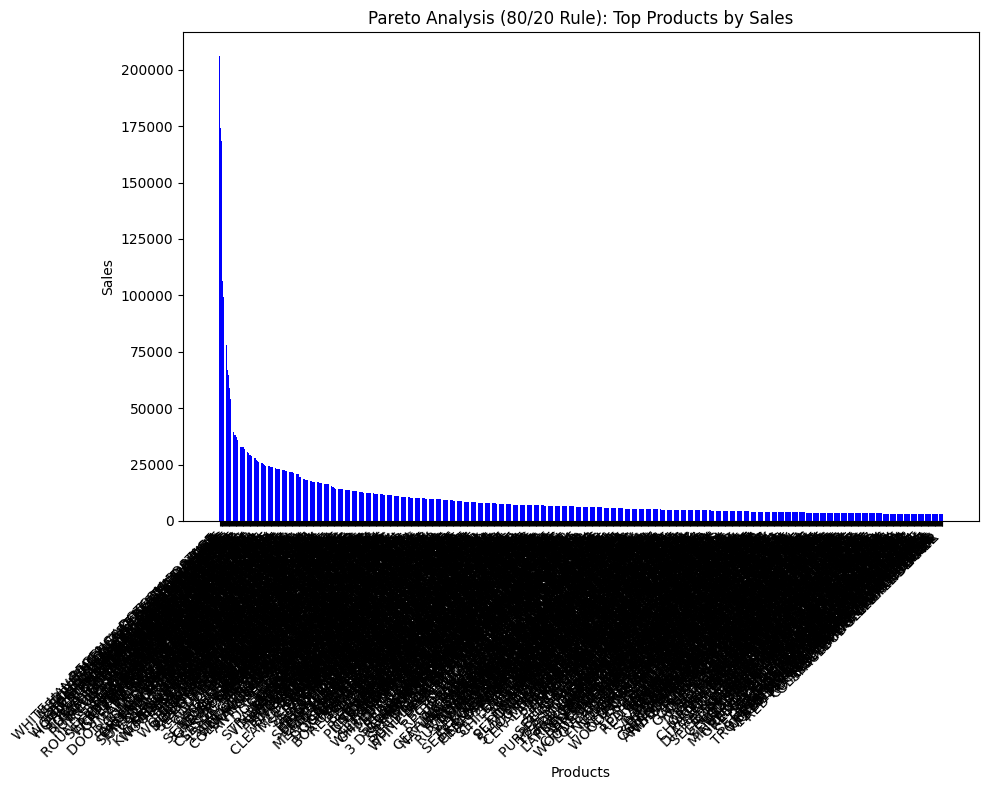

In [31]:

# Plot Pareto chart
plt.figure(figsize=(10, 8))
plt.bar(sales_by_product.index[:len(pareto_products)], sales_by_product[:len(pareto_products)], color='blue')
plt.title('Pareto Analysis (80/20 Rule): Top Products by Sales')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

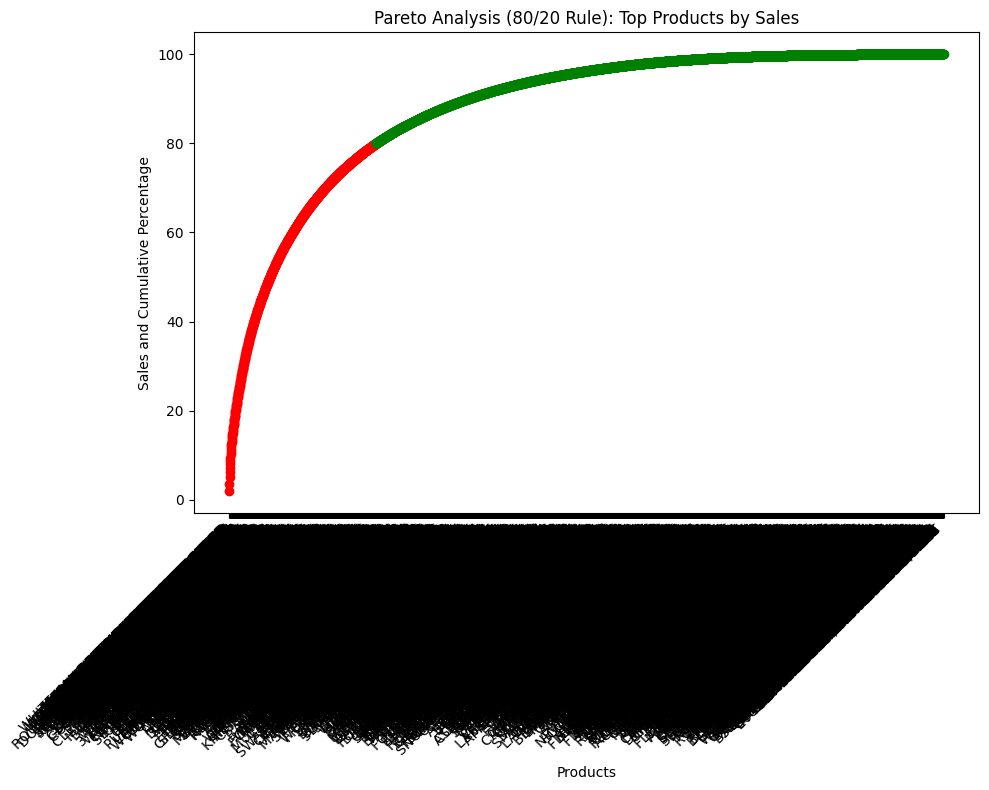

In [32]:

# Plot Pareto chart
plt.figure(figsize=(10, 8))

plt.plot(sales_percentage.index[:len(pareto_products)], sales_percentage[:len(pareto_products)], color='red', marker='o')
plt.plot(sales_percentage.index[len(pareto_products):], sales_percentage[len(pareto_products):], color='green', marker='o')
plt.title('Pareto Analysis (80/20 Rule): Top Products by Sales')
plt.xlabel('Products')
plt.ylabel('Sales and Cumulative Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
# sales_percentage

In [34]:

abc_analysis = pd.cut(sales_percentage, bins=[0, 80, 95, 101], labels=['A', 'B', 'C'])

abc_categories = pd.DataFrame({
    'Product': sales_by_product.index,
    'TotalSales': sales_by_product.values,
    'CumulativePercentage': sales_percentage.values,
    'ABC_Category': abc_analysis
})

abc_categories


,Product,TotalSales,CumulativePercentage,ABC_Category
Description,,,,
DOTCOM POSTAGE,DOTCOM POSTAGE,206248.770,1.938045,A
REGENCY CAKESTAND 3 TIER,REGENCY CAKESTAND 3 TIER,174156.540,3.574530,A
"PAPER CRAFT , LITTLE BIRDIE","PAPER CRAFT , LITTLE BIRDIE",168469.600,5.157577,A
WHITE HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,106236.720,6.155845,A
PARTY BUNTING,PARTY BUNTING,99445.230,7.090296,A
...,...,...,...,...
PINK CRYSTAL GUITAR PHONE CHARM,PINK CRYSTAL GUITAR PHONE CHARM,0.850,99.999982,C
VINTAGE BLUE TINSEL REEL,VINTAGE BLUE TINSEL REEL,0.840,99.999990,C
SET 12 COLOURING PENCILS DOILEY,SET 12 COLOURING PENCILS DOILEY,0.650,99.999996,C


In [35]:
abc_categories['ABC_Category'].value_counts()

ABC_Category
C    2193
B    1006
A     827
Name: count, dtype: int64

In [36]:

abc_analysis_summary = abc_categories.groupby('ABC_Category').agg({'TotalSales': ['sum', 'mean'], 'Product': 'count'})
# abc_analysis_summary

In [37]:
#alternative

# import inventorize3 as inv
# _s=df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).reset_index()
# inv.ABC(_s)

In [38]:



multi_criteria_analysis = df.groupby('Description').agg({
    'TotalSales': 'sum',
    'Quantity': 'sum'
}).sort_values(by='TotalSales', ascending=False)

# Display top products based on Total Sales and Quantity Sold
multi_criteria_analysis.head(10)


,TotalSales,Quantity
Description,,
DOTCOM POSTAGE,206248.77,706
REGENCY CAKESTAND 3 TIER,174156.54,13851
"PAPER CRAFT , LITTLE BIRDIE",168469.60,80995
WHITE HANGING HEART T-LIGHT HOLDER,106236.72,37872
PARTY BUNTING,99445.23,18283
JUMBO BAG RED RETROSPOT,94159.81,48371
MEDIUM CERAMIC TOP STORAGE JAR,81700.92,78033
POSTAGE,78101.88,3150
Manual,77752.82,6985


## 3. Forecasting Revenue





In [39]:
for_df=df.copy()
for_df.set_index('InvoiceDate', inplace=True)


weekly_total_revenue = for_df.resample('W').agg({'TotalSales': 'sum'})


In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Train on the entire dataset (weeks 1 to 54)
train = weekly_total_revenue['TotalSales']

steps=12


sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 16))  
sarima_result = sarima_model.fit()

# Forecast the next 6 weeks (weeks 55 to 60)
forecast = sarima_result.get_forecast(steps=steps)




forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

print(forecast_mean)
print(forecast_conf_int)


forecast_dates = pd.date_range(start=weekly_total_revenue.index[-1] + pd.Timedelta(weeks=1), periods=steps, freq='W')



2011-12-18    449014.355629
2011-12-25    446443.194469
2012-01-01    431065.032398
2012-01-08    427974.650072
2012-01-15    441662.413995
2012-01-22    440215.794247
2012-01-29    464220.501473
2012-02-05    421412.265578
2012-02-12    437805.199918
2012-02-19    454458.003768
2012-02-26    486696.622582
2012-03-04    551354.931925
Freq: W-SUN, Name: predicted_mean, dtype: float64
            lower TotalSales  upper TotalSales
2011-12-18     321155.590608     576873.120651
2011-12-25     299442.805045     593443.583893
2012-01-01     273049.528603     589080.536194
2012-01-08     260945.929799     595003.370345
2012-01-15     266391.239211     616933.588779
2012-01-22     257149.203250     623282.385243
2012-01-29     273694.778035     654746.224911
2012-02-05     223708.431405     619116.099752
2012-02-12     233176.854679     642433.545157
2012-02-19     243407.189343     665508.818194
2012-02-26     269342.793021     704050.452143
2012-03-04     327876.119839     774833.744011


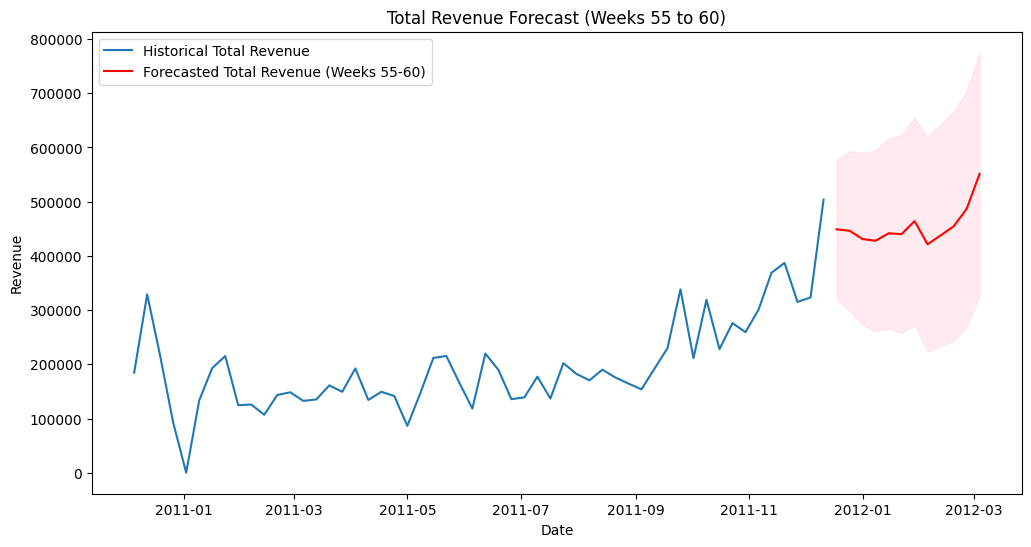

In [41]:

plt.figure(figsize=(12, 6))
plt.plot(weekly_total_revenue.index, weekly_total_revenue['TotalSales'], label='Historical Total Revenue')
plt.plot(forecast_dates, forecast_mean, label='Forecasted Total Revenue (Weeks 55-60)', color='red')
plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Total Revenue Forecast (Weeks 55 to 60)")
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524877 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524877 non-null  object        
 1   StockCode    524877 non-null  object        
 2   Description  524877 non-null  object        
 3   Quantity     524877 non-null  int64         
 4   InvoiceDate  524877 non-null  datetime64[ns]
 5   UnitPrice    524877 non-null  float64       
 6   CustomerID   524877 non-null  object        
 7   Country      524877 non-null  object        
 8   TotalSales   524877 non-null  float64       
 9   Date         524877 non-null  object        
 10  YearMonth    524877 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(6), period[M](1)
memory usage: 48.1+ MB


## 4. Demand  Classification

![Demand Segmentation Categories](https://miro.medium.com/v2/resize:fit:939/0*KQQmtAONkr_g8Smo.png)


In [43]:
daily_sales = df.groupby(['StockCode', 'Date']).agg({'TotalSales': 'sum'}).reset_index()

In [44]:
daily_sales['Date']=pd.to_datetime(daily_sales['Date'])


In [45]:
from tqdm import tqdm 

In [46]:


product_metrics = {}

for product in  tqdm(daily_sales['StockCode'].unique()):
    product_data = daily_sales[daily_sales['StockCode'] == product]
    
    
    demand_intervals = product_data['Date'].diff().dt.days  
    adi = demand_intervals.mean() if len(demand_intervals) > 1 else np.nan
    
   
    mean_demand = product_data['TotalSales'].mean()
    std_dev_demand = product_data['TotalSales'].std()
    cv_squared = (std_dev_demand / mean_demand) ** 2 if mean_demand > 0 else np.nan
    
    product_metrics[product] = {'ADI': adi, 'CV²': cv_squared}

metrics_df = pd.DataFrame(product_metrics).T


100%|██████████████████████████████████████████████████████████████████████████████| 3922/3922 [00:56<00:00, 69.85it/s]


In [47]:
metrics_df

,ADI,CV²
10002,3.066667,2.150954
10080,13.350000,0.564186
10120,15.913043,1.627717
10125,6.016129,2.159398
10133,2.568807,0.921621
...,...,...
gift_0001_20,37.375000,0.089192
gift_0001_30,40.000000,0.000064
gift_0001_40,109.500000,0.000149
gift_0001_50,63.000000,0.000110


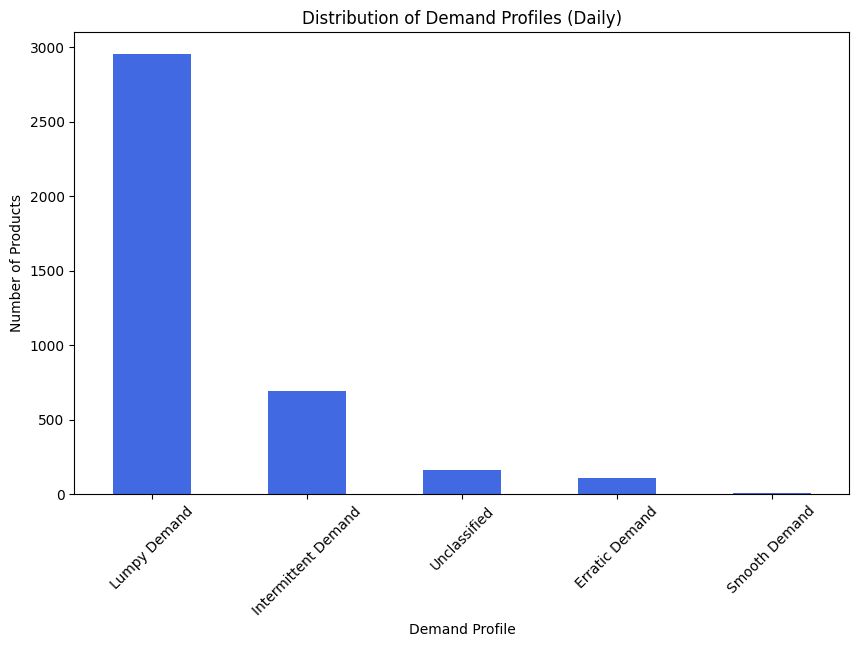

In [48]:
metrics_df['Demand Profile'] = np.select(
    [
        (metrics_df['ADI'] < 1.32) & (metrics_df['CV²'] < 0.49),
        (metrics_df['ADI'] >= 1.32) & (metrics_df['CV²'] < 0.49),
        (metrics_df['ADI'] < 1.32) & (metrics_df['CV²'] >= 0.49),
        (metrics_df['ADI'] >= 1.32) & (metrics_df['CV²'] >= 0.49)
    ],
    ['Smooth Demand', 'Intermittent Demand', 'Erratic Demand', 'Lumpy Demand'],
    default='Unclassified'
)


demand_profile_counts = metrics_df['Demand Profile'].value_counts()
demand_profile_counts.plot(kind='bar', figsize=(10, 6), color='royalblue')
plt.title('Distribution of Demand Profiles (Daily)')
plt.xlabel('Demand Profile')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()




<Axes: xlabel='CV²', ylabel='ADI'>

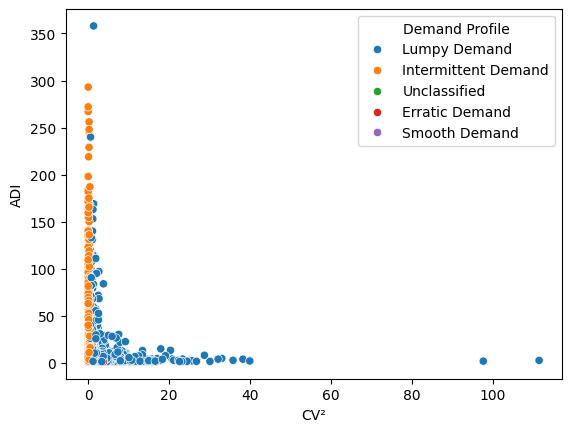

In [49]:
sns.scatterplot(x='CV²',y='ADI',hue='Demand Profile',data=metrics_df)

## 5. Inventory Optimization (EOQ, Lead Time)
### ordering_cost=5 lead_time_days= 7

In [50]:

product_data=df[['Description', 'Quantity', 'UnitPrice','InvoiceDate']]
product_data

,Description,Quantity,UnitPrice,InvoiceDate
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,2010-12-01
1,WHITE METAL LANTERN,6,3.39,2010-12-01
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,2010-12-01
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,2010-12-01
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,2010-12-01
...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,0.85,2011-12-09
541905,CHILDREN'S APRON DOLLY GIRL,6,2.10,2011-12-09
541906,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,2011-12-09
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,2011-12-09


In [51]:
ordering_cost=5
lead_time_days= 7

In [52]:
# Group by product to get total sales per product
product_sales = product_data.groupby('Description').agg(
    total_sales=('Quantity', 'sum'),  # Total units sold for each product
    UnitPrice=('UnitPrice', 'mean')  # Average unit price (in case of price variations)
).reset_index()

# Calculate Average Daily Demand for each product (since we have daily sales)
product_sales['average_daily_demand'] = product_sales['total_sales'] / len(product_data['InvoiceDate'].unique())  # number of unique days

# Calculate Holding Cost (10% of UnitPrice)
product_sales['holding_cost_per_unit'] = 0.2 * product_sales['UnitPrice']

product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Description            4026 non-null   object 
 1   total_sales            4026 non-null   int64  
 2   UnitPrice              4026 non-null   float64
 3   average_daily_demand   4026 non-null   float64
 4   holding_cost_per_unit  4026 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 157.4+ KB


In [53]:

# Calculate EOQ
product_sales['EOQ'] = np.sqrt(
    ((2 * product_sales['total_sales'] * ordering_cost) ) / product_sales['holding_cost_per_unit']
)

# Calculate Lead Time Demand (Demand for the lead time period, e.g., 7 days)
product_sales['lead_time_demand'] = product_sales['average_daily_demand'] * lead_time_days




In [54]:
# Sort by EOQ and select top 10 products
top_eoq_products = product_sales.nlargest(10, 'EOQ')
top_eoq_products


,Description,total_sales,UnitPrice,average_daily_demand,holding_cost_per_unit,EOQ,lead_time_demand
2680,POPART WOODEN PENCILS ASST,8900,0.043478,29.180328,0.008696,3199.218655,204.262295
3934,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951,0.320728,180.167213,0.064146,2926.878045,1261.170492
999,DISCO BALL CHRISTMAS DECORATION,12883,0.164450,42.239344,0.032890,1979.142990,295.675410
564,BROCADE RING PURSE,23020,0.363402,75.475410,0.072680,1779.687347,528.327869
2303,PACK OF 12 LONDON TISSUES,26119,0.448260,85.636066,0.089652,1706.861423,599.452459
2052,MEDIUM CERAMIC TOP STORAGE JAR,78033,1.468480,255.845902,0.293696,1630.009502,1790.921311
2337,PACK OF 72 RETROSPOT CAKE CASES,36396,0.761206,119.331148,0.152241,1546.182797,835.318033
2387,"PAPER CRAFT , LITTLE BIRDIE",80995,2.080000,265.557377,0.416000,1395.347696,1858.901639
2681,POPCORN HOLDER,36749,1.020836,120.488525,0.204167,1341.620541,843.419672
2469,PIECE OF CAMO STATIONERY SET,3380,0.096774,11.081967,0.019355,1321.489059,77.573770


                            Description          EOQ
2680         POPART WOODEN PENCILS ASST  3199.218655
3934  WORLD WAR 2 GLIDERS ASSTD DESIGNS  2926.878045
999     DISCO BALL CHRISTMAS DECORATION  1979.142990
564                 BROCADE RING PURSE   1779.687347
2303         PACK OF 12 LONDON TISSUES   1706.861423
2052     MEDIUM CERAMIC TOP STORAGE JAR  1630.009502
2337    PACK OF 72 RETROSPOT CAKE CASES  1546.182797
2387        PAPER CRAFT , LITTLE BIRDIE  1395.347696
2681                     POPCORN HOLDER  1341.620541
2469       PIECE OF CAMO STATIONERY SET  1321.489059


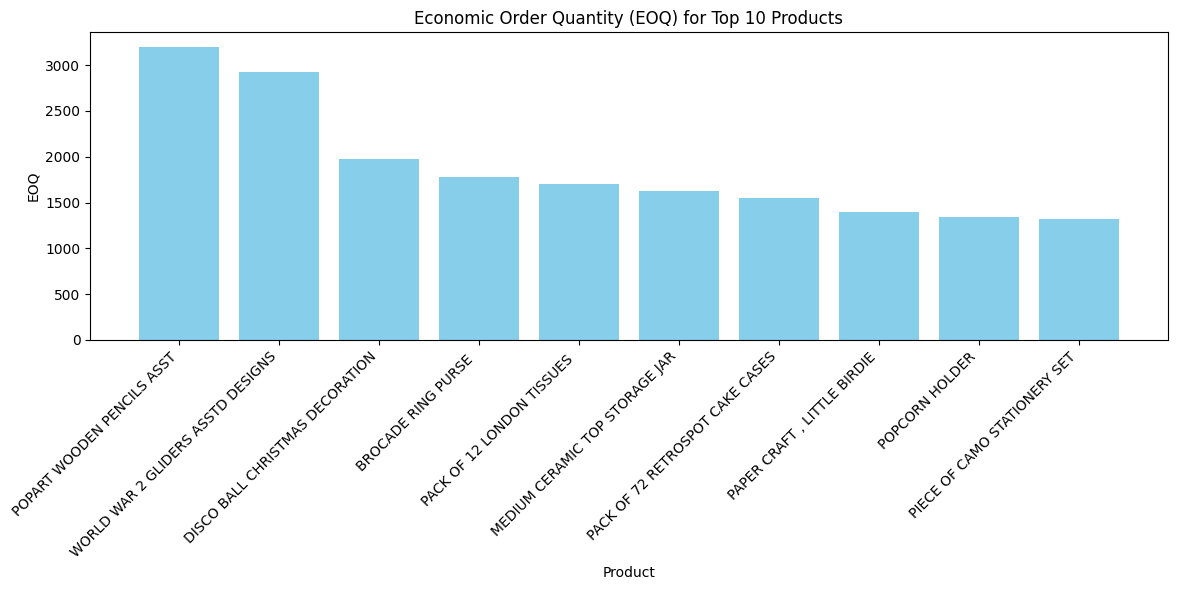

In [55]:
# Sort by EOQ and select top 10 products with the highest EOQ
top_eoq_products = product_sales.nlargest(10, 'EOQ')

# Check the selected products to make sure there are multiple entries
print(top_eoq_products[['Description', 'EOQ']])

# Plot EOQ for Top 10 Products
plt.figure(figsize=(12, 6))
plt.bar(top_eoq_products['Description'], top_eoq_products['EOQ'], color='skyblue')
plt.title('Economic Order Quantity (EOQ) for Top 10 Products')
plt.xlabel('Product')
plt.ylabel('EOQ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 6. Customer Segmentation :mRFM Analysis (Recency, Frequency, Monetary)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524877 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524877 non-null  object        
 1   StockCode    524877 non-null  object        
 2   Description  524877 non-null  object        
 3   Quantity     524877 non-null  int64         
 4   InvoiceDate  524877 non-null  datetime64[ns]
 5   UnitPrice    524877 non-null  float64       
 6   CustomerID   524877 non-null  object        
 7   Country      524877 non-null  object        
 8   TotalSales   524877 non-null  float64       
 9   Date         524877 non-null  object        
 10  YearMonth    524877 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(6), period[M](1)
memory usage: 48.1+ MB


In [57]:
df['Date']=pd.to_datetime(df['Date'])
max_date = df['Date'].max()

max_date

Timestamp('2011-12-09 00:00:00')

In [58]:


# Group by 'Customer ID' to get the last purchase date for each customer
customers_recency = df.groupby('CustomerID').agg(last_date=('Date', 'max')).reset_index()



In [59]:

customers_recency['recency'] = (max_date - customers_recency['last_date']).dt.days

# Display the result
customers_recency


,CustomerID,last_date,recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
...,...,...,...
4334,18281.0,2011-06-12,180
4335,18282.0,2011-12-02,7
4336,18283.0,2011-12-06,3
4337,18287.0,2011-10-28,42


In [60]:
freq=df.groupby(['CustomerID','InvoiceNo']).agg(count=('Description','count')).reset_index()

In [61]:
customers_frequency=freq.groupby(['CustomerID']).agg(frequency=('count','count')).reset_index()

In [62]:
customers_frequency

,CustomerID,frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4334,18281.0,1
4335,18282.0,2
4336,18283.0,16
4337,18287.0,3


In [63]:
monetary=df.groupby(['CustomerID']).agg(revenue=('TotalSales','sum')).reset_index()
monetary

,CustomerID,revenue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2045.53
4337,18287.0,1837.28


In [64]:
# rank reversely so i can use them as scores
customers_recency['rank_recency']=customers_recency['recency'].rank(pct=True,ascending=False)
customers_frequency['rank_frequency']=customers_frequency['frequency'].rank(ascending=True,pct=True)
monetary['rank_monetary']=monetary['revenue'].rank(ascending=False,pct=True)

In [65]:
rfm=pd.merge(customers_recency,customers_frequency)
rfm=pd.merge(rfm,monetary)
rfm

,CustomerID,last_date,recency,rank_recency,frequency,rank_frequency,revenue,rank_monetary
0,12346.0,2011-01-18,325,0.037451,1,0.172159,77183.60,0.002535
1,12347.0,2011-12-07,2,0.957709,7,0.855036,4310.00,0.077437
2,12348.0,2011-09-25,75,0.379350,4,0.698433,1797.24,0.231620
3,12349.0,2011-11-21,18,0.739687,1,0.172159,1757.55,0.236921
4,12350.0,2011-02-02,310,0.052431,1,0.172159,334.40,0.713989
...,...,...,...,...,...,...,...,...
4334,18281.0,2011-06-12,180,0.198202,1,0.172159,80.82,0.976262
4335,18282.0,2011-12-02,7,0.884651,2,0.440424,178.05,0.873243
4336,18283.0,2011-12-06,3,0.936506,16,0.963817,2045.53,0.201659
4337,18287.0,2011-10-28,42,0.543213,3,0.595183,1837.28,0.226089


In [66]:

rfm['score'] = (rfm['rank_recency'] + rfm['rank_frequency'] + rfm['rank_monetary']) / 3


rfm

In [67]:
rfm


,CustomerID,last_date,recency,rank_recency,frequency,rank_frequency,revenue,rank_monetary,score
0,12346.0,2011-01-18,325,0.037451,1,0.172159,77183.60,0.002535,0.070715
1,12347.0,2011-12-07,2,0.957709,7,0.855036,4310.00,0.077437,0.630061
2,12348.0,2011-09-25,75,0.379350,4,0.698433,1797.24,0.231620,0.436468
3,12349.0,2011-11-21,18,0.739687,1,0.172159,1757.55,0.236921,0.382922
4,12350.0,2011-02-02,310,0.052431,1,0.172159,334.40,0.713989,0.312860
...,...,...,...,...,...,...,...,...,...
4334,18281.0,2011-06-12,180,0.198202,1,0.172159,80.82,0.976262,0.448875
4335,18282.0,2011-12-02,7,0.884651,2,0.440424,178.05,0.873243,0.732773
4336,18283.0,2011-12-06,3,0.936506,16,0.963817,2045.53,0.201659,0.700661
4337,18287.0,2011-10-28,42,0.543213,3,0.595183,1837.28,0.226089,0.454828


In [68]:

import pandas as pd


best_threshold = 0.6 
big_spender_threshold = 0.7 
loyal_customer_threshold = 0.5  



def classify_customer(row):
    # Best Customers: Top in Recency, Frequency, and Monetary
    if row['rank_recency'] >= best_threshold and row['rank_frequency'] >= best_threshold and row['rank_monetary'] >= best_threshold:
        return 'Best Customers'
    # Big Spenders: Top in Monetary only
    elif row['rank_monetary'] >= big_spender_threshold:
        return 'Big Spenders'
    # Loyal Customers: Top in Frequency only
    elif row['rank_frequency'] >= loyal_customer_threshold:
        return 'Loyal Customers'
    # Faithful Customers: Top in Frequency, low in Monetary
    elif row['rank_frequency'] >= loyal_customer_threshold and row['rank_monetary'] < 0.3:
        return 'Faithful Customers'
    # At-Risk Customers: Low Recency and Frequency but previously top tier
    elif row['rank_recency'] < 0.2 and row['rank_frequency'] < 0.2:
        return 'At-Risk Customers'
    else:
        return 'Other'

rfm['segment'] = rfm.apply(classify_customer, axis=1)




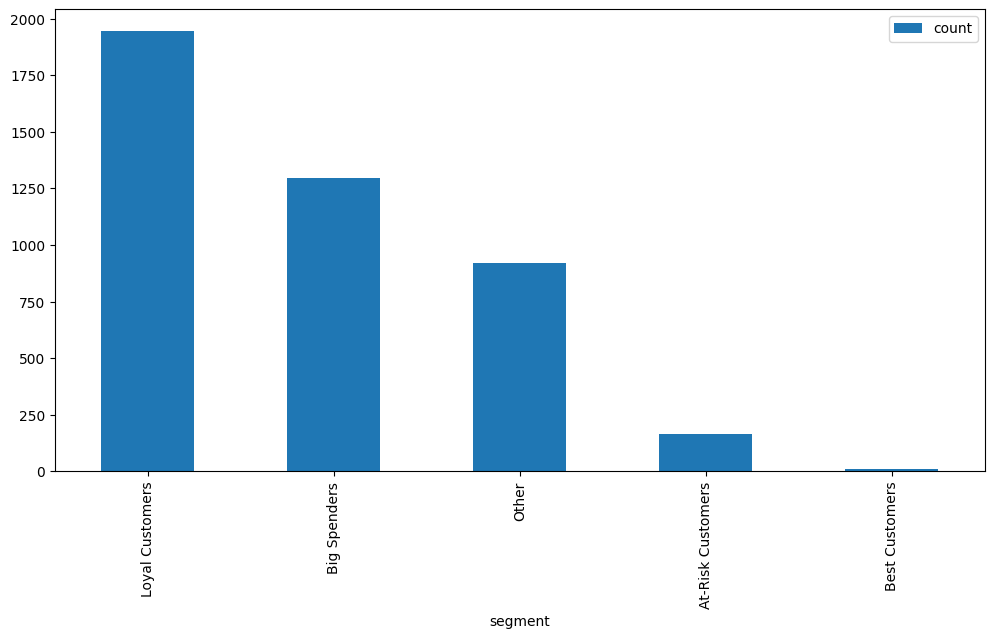

In [69]:
plt.figure(figsize=(12,6))
rfm['segment'].value_counts().plot(kind='bar')
plt.legend()
plt.show()

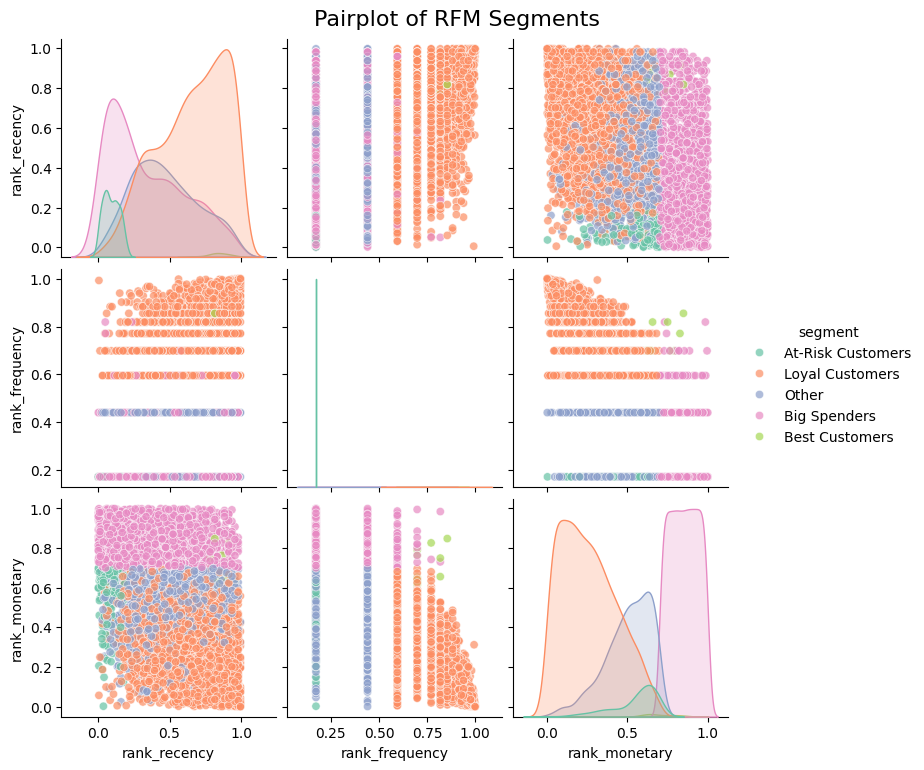

In [70]:

sns.pairplot(
    rfm, 
    hue='segment', 
    vars=['rank_recency', 'rank_frequency', 'rank_monetary'], 
    palette='Set2', 
    
    plot_kws={'alpha': 0.7} 
)


plt.suptitle("Pairplot of RFM Segments", size=16, y=1.02)
plt.show()

## 7. Geographical Mapping with Latitude, Longitude to Show Stats


In [71]:
countries= list(df['Country'].unique())


In [87]:
#  from internet
country_coords = {
    'United Kingdom': (51.5074, -0.1278),
    'France': (46.6034, 1.8883),
    'Australia': (-25.2744, 133.7751),
    'Netherlands': (52.3784, 4.9009),
    'Germany': (51.1657, 10.4515),
    'Norway': (60.4720, 8.4689),
    'EIRE': (53.4129, -8.2437),
    'Switzerland': (46.8182, 8.2275),
    'Spain': (40.4637, -3.7492),
    'Poland': (51.9194, 19.1451),
    'Portugal': (39.3999, -8.2245),
    'Italy': (41.8719, 12.5674),
    'Belgium': (50.8503, 4.3517),
    'Lithuania': (55.1694, 23.8813),
    'Japan': (36.2048, 138.2529),
    'Iceland': (64.9631, -19.0208),
    'Channel Islands': (49.4144, -2.6050),
    'Denmark': (56.2639, 9.5018),
    'Cyprus': (35.1264, 33.4299),
    'Sweden': (60.1282, 18.6435),
    'Finland': (61.9241, 25.7482),
    'Austria': (47.5162, 14.5501),
    'Bahrain': (25.276987, 50.637772),
    'Israel': (31.0461, 34.8516),
    'Greece': (39.0742, 21.8243),
    'Hong Kong': (22.3193, 114.1694),
    'Singapore': (1.3521, 103.8198),
    'Lebanon': (33.8547, 35.8623),
    'United Arab Emirates': (23.4241, 53.8478),
    'Saudi Arabia': (23.8859, 45.0792),
    'Czech Republic': (49.8175, 15.4720),
    'Canada': (56.1304, -106.3468),
    'Unspecified': (0.0, 0.0),
    'Brazil': (-14.2350, -51.9253),
    'USA': (37.0902, -95.7129),
    'European Community': (47.0, 8.0),
    'Malta': (35.9375, 14.3754),
    'RSA': (-30.5595, 22.9375)
}


In [88]:

country_data= df.groupby('Country')['TotalSales'].sum().reset_index()
country_data= country_data.sort_values(by='TotalSales', ascending=False)
country_data['Latitude'] = country_data['Country'].map(lambda x: country_coords.get(x, (0, 0))[0])
country_data['Longitude'] = country_data['Country'].map(lambda x: country_coords.get(x, (0, 0))[1])


In [89]:
country_data

,Country,TotalSales,Latitude,Longitude
36,United Kingdom,9001740.194,51.507400,-0.127800
24,Netherlands,285446.340,52.378400,4.900900
10,EIRE,283140.520,53.412900,-8.243700
14,Germany,228678.400,51.165700,10.451500
13,France,209625.370,46.603400,1.888300
0,Australia,138453.810,-25.274400,133.775100
31,Spain,61558.560,40.463700,-3.749200
33,Switzerland,57067.600,46.818200,8.227500
3,Belgium,41196.340,50.850300,4.351700
32,Sweden,38367.830,60.128200,18.643500


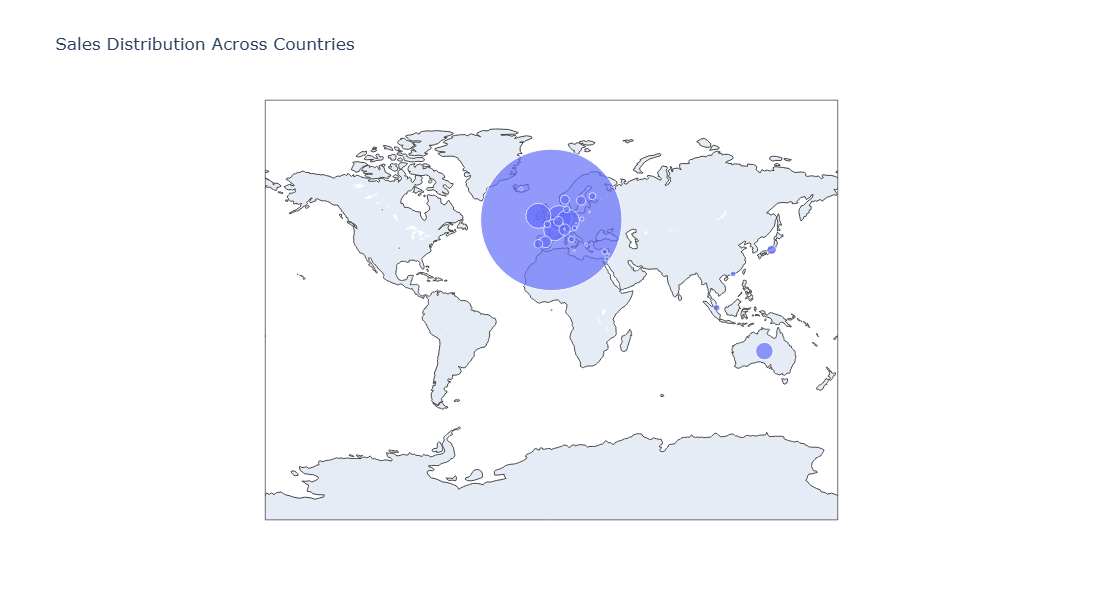

In [90]:
from plotly import express as px
fig = px.scatter_geo(
    country_data,
    lat='Latitude',
    lon='Longitude',
    hover_name='Country',
    size='TotalSales',  
    size_max=100,      
    title="Sales Distribution Across Countries",
    projection="miller" ,
     width=1000,  
    height=600  
)

fig.show()